Andrzej Czechowski nr. 307335


## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^{n+1}$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $\w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

In [2]:
from seaborn import load_dataset
iris = load_dataset("iris")
print(iris.head())
sns.pairplot(iris, kind="scatter", hue = "species")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


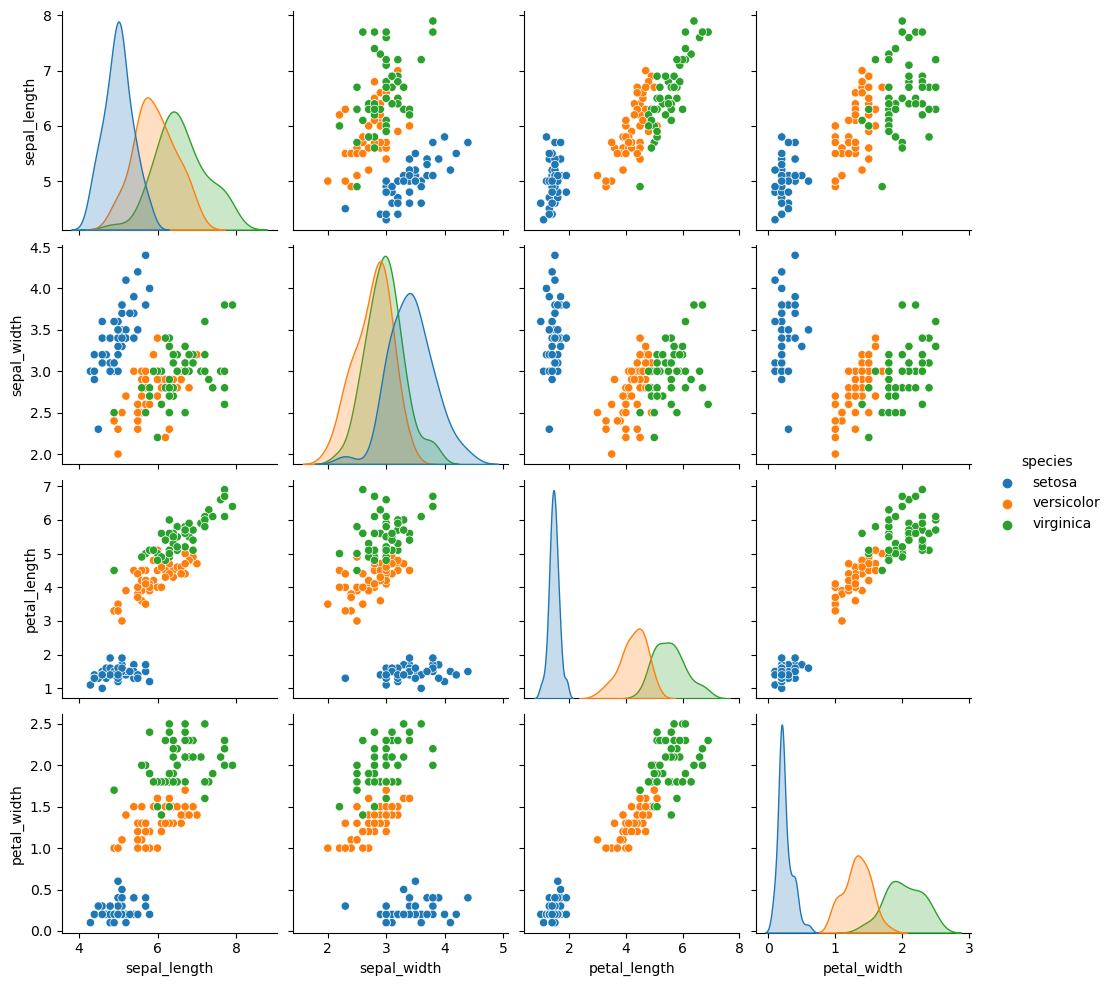

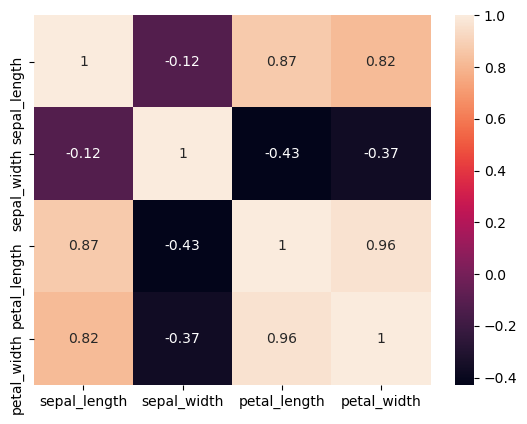

In [3]:
plt.figure()
sns.heatmap(iris.corr(),annot = iris.corr())
plt.show()

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [4]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [5]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [6]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [7]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

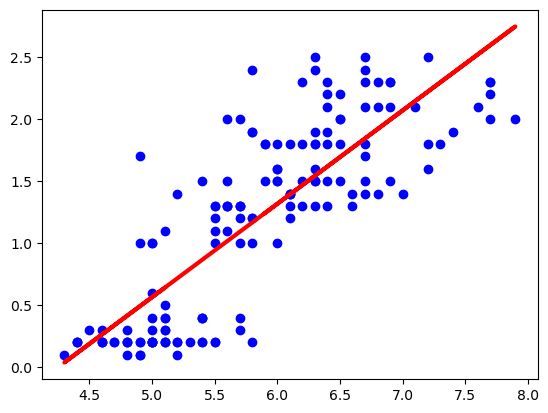

In [8]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [9]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość bładu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [10]:
def linear_regression(dane ,colums):
# def linear_regression(x,y ):
    x = dane.iloc[:,colums[0]]
    y = dane.iloc[:,colums[1]]
    X = np.c_[ np.ones(x.shape[0]),x ] 

    pseudo_inv = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
    w = np.dot(pseudo_inv,y)

    e =  sum((w[0] + w[1]*x - y)**2)
    
    return w,e

linear_regression(iris,[0,1])

(array([ 3.41894684, -0.0618848 ]), 27.915656384072044)

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji ?

In [11]:
for i in range(4):
    for z in range(i+1,4):
        print(iris.columns[[i,z]].values)
        w,e =linear_regression(iris,[i,z])
        print(e) 


['sepal_length' 'sepal_width']
27.915656384072044
['sepal_length' 'petal_length']
111.45915511981862
['sepal_length' 'petal_width']
28.65225115414103
['sepal_width' 'petal_length']
379.0934010042298
['sepal_width' 'petal_width']
74.96538972784052
['petal_length' 'petal_width']
6.310096379248975


Najwiekszy bład : sepal_width i petal_length oraz najmniejsza korelacja  
Najmniejszy bład : petal_length  i petal_width oraz najwieksza korelacja 
 

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

<Figure size 640x480 with 0 Axes>

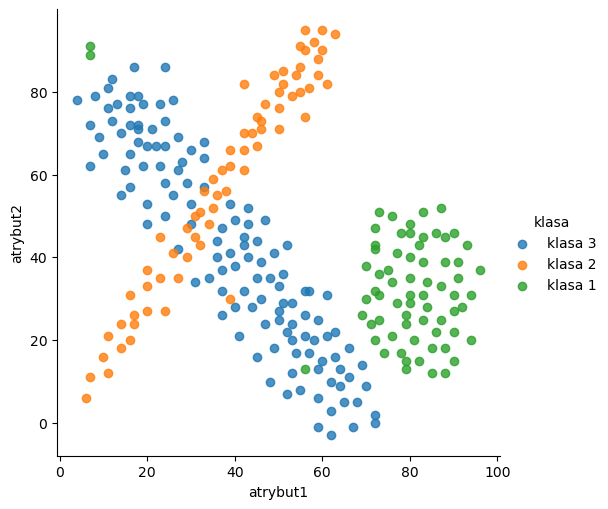

In [12]:
d = pd.read_csv('MED/dane10.csv')
plt.figure()
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=True)
plt.show()

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [13]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


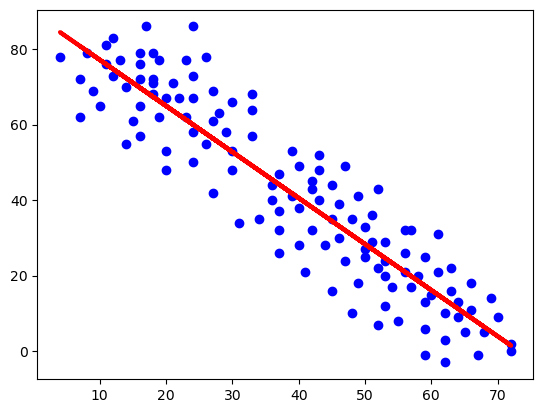

In [14]:
regressor = LinearRegression()  
regressor.fit(x,y) 

y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

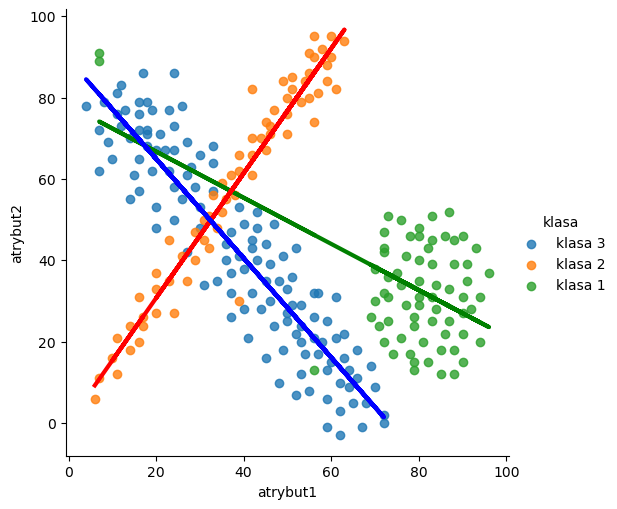

In [15]:

sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=True)

for klasa,color in  zip(['klasa 1','klasa 2','klasa 3'],['green','red','blue']):    
    dd = d[d.klasa ==  klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y) 
    y_pred = regressor.predict(x)
#     plt.scatter(x, y,  color='blue')
    plt.plot(x, y_pred, color=color, linewidth=3)

plt.show()    

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [16]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

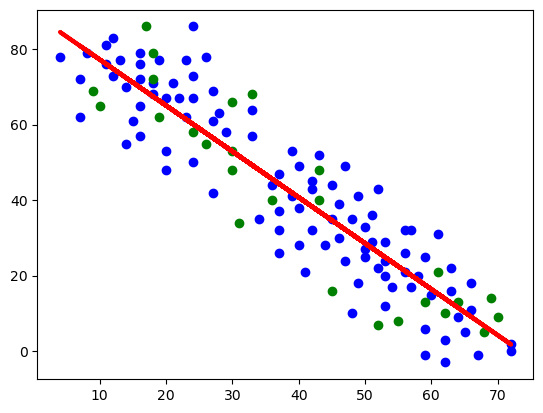

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [17]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na ucżacy i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne ? Dlaczego ?

In [18]:
d = pd.read_csv('MED/dane10.csv')
for klasa in  ['klasa 1','klasa 2', 'klasa 3']:   
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    print(klasa)
    e_ucz = {}
    e_test = {}
    for state in range(5):
        x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=state)
        regressor = LinearRegression()  
        regressor.fit(x_ucz,y_ucz) 
        y_pred_ucz = regressor.predict(x_ucz)
        e_ucz[state] = metrics.mean_squared_error(y_ucz, y_pred_ucz)
        y_pred_test = regressor.predict(x_test)
        e_test[state] = metrics.mean_squared_error(y_test, y_pred_test)
    print('błąd uczenia',e_ucz)
    print('błąd generalizacji',e_test)

klasa 1
błąd uczenia {0: 143.7605900852357, 1: 157.46975060274795, 2: 131.27805869695464, 3: 139.9661770650921, 4: 155.12246747650738}
błąd generalizacji {0: 195.55161262816824, 1: 145.0444534364505, 2: 233.79459697297048, 3: 199.16746921114625, 4: 138.61516482112725}
klasa 2
błąd uczenia {0: 48.45425790798866, 1: 41.63244168612218, 2: 25.047016662503548, 3: 42.98247977621741, 4: 42.30565673026997}
błąd generalizacji {0: 10.180715401260002, 1: 37.52277611819982, 2: 101.8608311809229, 3: 33.897310509375316, 4: 34.83702227328572}
klasa 3
błąd uczenia {0: 97.90961693115158, 1: 117.74438392608673, 2: 99.93213036113795, 3: 95.59539908650919, 4: 83.83758315848932}
błąd generalizacji {0: 109.05710100604452, 1: 33.063579082352526, 2: 106.36792163429439, 3: 119.84136631554688, 4: 170.29735621154043}


-Wszytkie modele są nie stabilne widąc to po błedzie genralizacji, ale najbardziej to klasa 1, która nie ma najmniejszą zaleznosci liniowej ( widać to na wykresie 7,8).

-Niestapilność modeli wynika, faktu, że duży wpływ na bład srednia kwadratowy mają przypadki skrajne.

# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trensu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

<IPython.core.display.Javascript object>


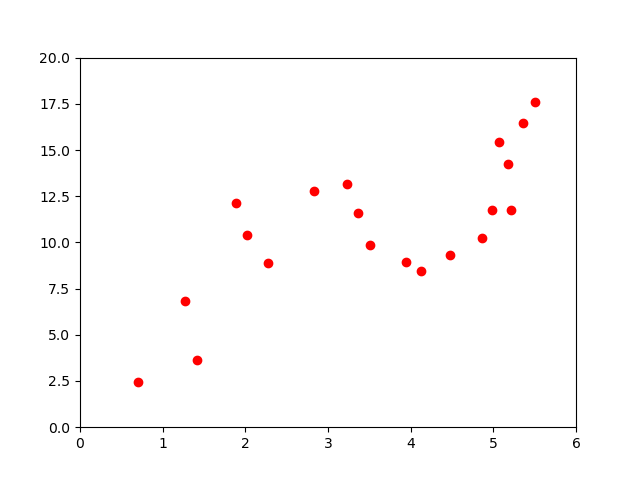

In [21]:
%matplotlib notebook
ile_probek = 20
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [67]:
print(df.info())
df = df.sort_values(by=['x']).reset_index()
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 480.0 bytes
None


,index,x,y
0,0,0.706452,2.451299
1,1,1.275000,6.834416
2,19,1.420161,3.641775
3,18,1.891935,12.137446
4,2,2.025000,10.405844
5,17,2.279032,8.890693
6,3,2.835484,12.786797
7,16,3.234677,13.165585
8,4,3.367742,11.596321
9,5,3.512903,9.864719


<IPython.core.display.Javascript object>


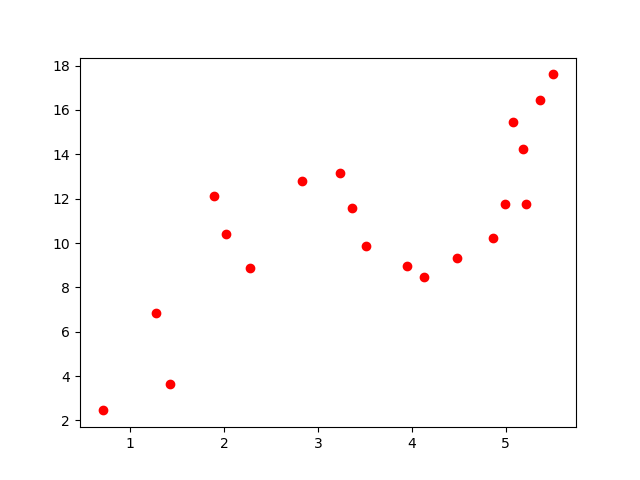

In [23]:
plt.figure()
plt.scatter(df.x, df.y, color='red')


> **Zadanie** Napisz funkcję, która stworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [27]:
def create_matrix_X(x,degree):
    X = np.c_[ np.ones(x.shape[0]), x]
    for i  in range(2,degree+1):
        X = np.c_[X, x**i]
    return X
create_matrix_X(df.x,2)

array([[ 1.        ,  0.70645154,  0.49907378],
       [ 1.        ,  1.27499993,  1.62562481],
       [ 1.        ,  2.02499993,  4.1006247 ],
       [ 1.        ,  2.8354838 ,  8.03996836],
       [ 1.        ,  3.36774186, 11.34168525],
       [ 1.        ,  3.51290315, 12.34048856],
       [ 1.        ,  3.94838702, 15.58976008],
       [ 1.        ,  4.48064509, 20.0761804 ],
       [ 1.        ,  4.9887096 , 24.88722351],
       [ 1.        ,  5.18225799, 26.85579788],
       [ 1.        ,  5.50887089, 30.34765853],
       [ 1.        ,  5.3637096 , 28.76938071],
       [ 1.        ,  5.07338702, 25.73925588],
       [ 1.        ,  5.21854831, 27.2332465 ],
       [ 1.        ,  4.86774186, 23.69491083],
       [ 1.        ,  4.12983864, 17.05556716],
       [ 1.        ,  3.23467735, 10.46313753],
       [ 1.        ,  2.27903218,  5.1939877 ],
       [ 1.        ,  1.89193541,  3.5794196 ],
       [ 1.        ,  1.42016122,  2.01685788]])

> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [28]:
def calculate_omega(X,Y):
    return np.dot(np.linalg.pinv(X),Y)
calculate_omega(create_matrix_X(df.x,2),df.y)

array([ 2.94355734,  2.90422132, -0.16682342])

> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


<IPython.core.display.Javascript object>


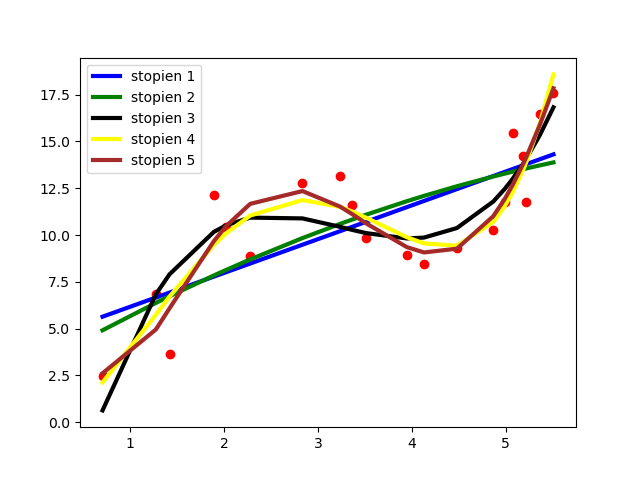

<IPython.core.display.Javascript object>


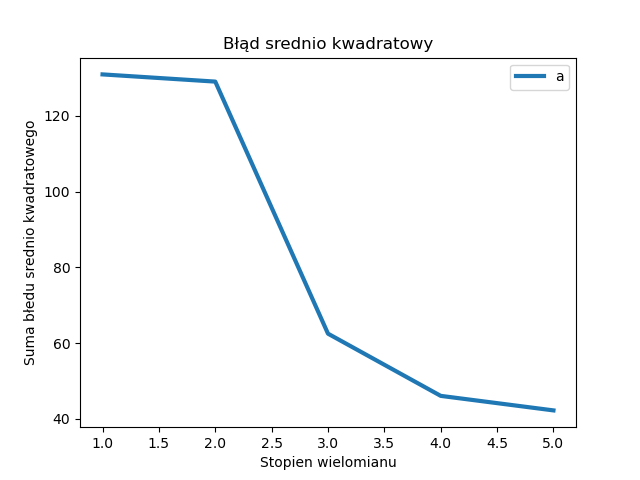

In [107]:
def display_lines_trends_calculate_square_error(x,y,x_test = None,y_test =None):
    plt.figure()
    plt.scatter(x, y, color='red')
    error = []
    error_test = []
    
    for degree,color in zip(range(1,6),['blue','green','black','yellow','brown']):
        X = create_matrix_X(x,degree)
        w = calculate_omega(X,y)
        y_est = np.dot(X,w)
        error.append(sum((y_est - y)**2))
#         y_est, error[i] = cal_y_est_and_square_error(w,X,y)
        plt.plot(x, y_est, color=color, linewidth=3,label = f'stopien {degree}',)
        if x_test is not None and y_test is not None:
            X = create_matrix_X(x_test,degree)
            y_est_test = np.dot(X,w)
            error_test.append(sum((y_est_test - y_test)**2))   
    plt.legend()
    return error,error_test
# def cal_y_est_and_square_error(w,X,y):
#     y_est = np.dot(X,w)
#     return y_est,sum((y_est - y)**2)
def display_square_errors(erros:list,labels:list):
    plt.figure()
    plt.title('Błąd srednio kwadratowy')
    plt.xlabel('Stopien wielomianu')
    plt.ylabel('Suma błedu srednio kwadratowego')
    for e,label in zip(erros,labels):
        plt.plot(range(1,6),e, linewidth=3,label = label)
    plt.legend()
error,error_test = display_lines_trends_calculate_square_error(df.x,df.y)
display_square_errors([error],'a')

Funkcja jest malejaca, jesli stopien wielomianu był o jeden mniejszy niż ilość punktów to błąd byłby równy zero. 

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

In [ ]:
A = np.c_[ np.ones(iris.shape[0]), iris.iloc[:,0]]
w,res,rank,s = np.linalg.lstsq(A,iris.iloc[:,1].values,rcond=None)
w

> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

<IPython.core.display.Javascript object>


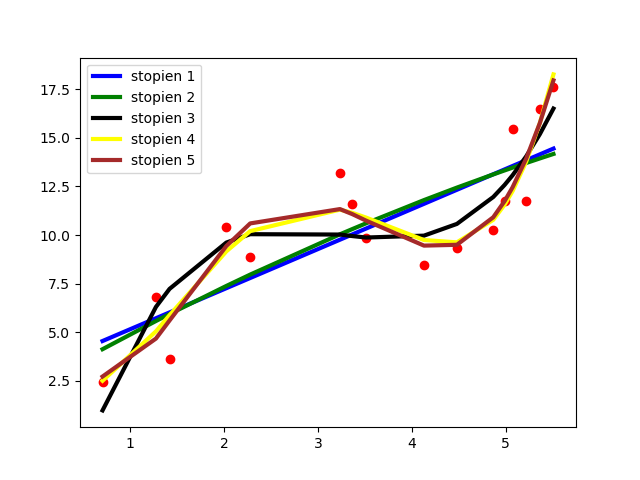

<IPython.core.display.Javascript object>


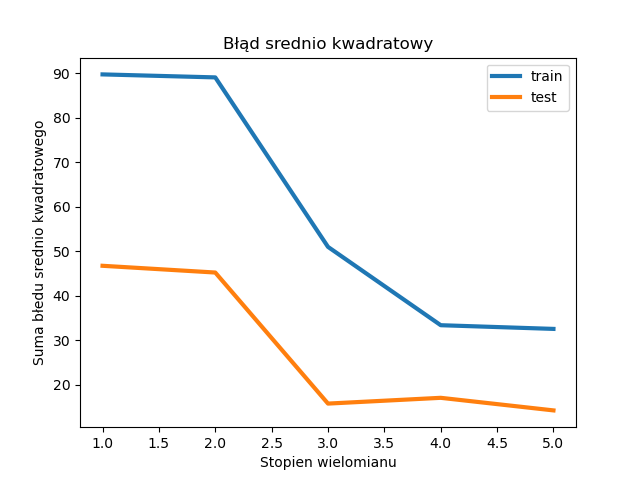

In [109]:

x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.2, random_state=1)
error_train,error_test = display_lines_trends_calculate_square_error(x_ucz.sort_index(),y_ucz.sort_index(),x_test.sort_index(),y_test.sort_index())
display_square_errors([error_train,error_test],['train','test'])




- Błąd średnio kwadratowy jest wiekszy na zbioru treningowego, ponieważ wynika to z faktu, wiekszej ilości danych.
- Można zauważyć, ze dla stopnia 4 bład generalizacji zwrasta. 
- Najlpeszym stopniem wielomianu jest 5, poniewaz dla danych testowych oraz traningowych uzyskuje najmniejszy błąd.

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. Tak, bedzie to wtedy interpolacja, czyli stopien wielomianu bedzię rownał n-1, gdzie n to ilość punktów 
2. Nie, poniewąz utracimy wtedy zdolność generalizacji modelu.
3. Nie, wystepują równia sprzeczne  (w zbiorze liczb rzeczywistych np. x**2 + 1 = 0)
4. Wielkości parametrów zblizą się do zera. 